In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv('/home/bashar/Downloads/ML/events.csv') \
                  .drop(['product_id','category_id', 'category_code', \
                         'brand', 'price', 'user_session'], axis = 1)

In [4]:
df

,event_time,event_type,user_id
0,2020-09-24 11:57:06 UTC,view,1515915625519388267
1,2020-09-24 11:57:26 UTC,view,1515915625519380411
2,2020-09-24 11:57:27 UTC,view,1515915625513238515
3,2020-09-24 11:57:33 UTC,view,1515915625519014356
4,2020-09-24 11:57:36 UTC,view,1515915625510743344
...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,1515915625611023730
885125,2021-02-28 23:58:05 UTC,view,1515915625611024014
885126,2021-02-28 23:58:09 UTC,view,1515915625611024020
885127,2021-02-28 23:58:14 UTC,view,1515915625611024030


In [6]:
df['current_month'] = pd.to_datetime(df['event_time']).dt.year.map(str) \
                                 + "-" + pd.to_datetime(df['event_time']) \
                                 .dt.month.map(str) + "-" '01'

df['current_month'] = pd.to_datetime(df['current_month']).dt.date

In [7]:
df["cohort_month"] = df.groupby("user_id")["current_month"].transform("min")


In [8]:
df

,event_time,event_type,user_id,current_month,cohort_month
0,2020-09-24 11:57:06 UTC,view,1515915625519388267,2020-09-01,2020-09-01
1,2020-09-24 11:57:26 UTC,view,1515915625519380411,2020-09-01,2020-09-01
2,2020-09-24 11:57:27 UTC,view,1515915625513238515,2020-09-01,2020-09-01
3,2020-09-24 11:57:33 UTC,view,1515915625519014356,2020-09-01,2020-09-01
4,2020-09-24 11:57:36 UTC,view,1515915625510743344,2020-09-01,2020-09-01
...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,1515915625611023730,2021-02-01,2021-02-01
885125,2021-02-28 23:58:05 UTC,view,1515915625611024014,2021-02-01,2021-02-01
885126,2021-02-28 23:58:09 UTC,view,1515915625611024020,2021-02-01,2021-02-01
885127,2021-02-28 23:58:14 UTC,view,1515915625611024030,2021-02-01,2021-02-01


In [9]:
def cohort_index(df, col1, col2):

  current_year = pd.to_datetime(df[col1]).dt.year
  current_month = pd.to_datetime(df[col2]).dt.month
  cohort_year = pd.to_datetime(df[col1]).dt.year
  cohort_month = pd.to_datetime(df[col2]).dt.month
  return (current_year - cohort_year) * 12 + current_month - cohort_month

df['cohort_index'] = cohort_index(df, "current_month", "cohort_month")

In [10]:
def months_diff(df, col1, col2):
    current_month = pd.to_datetime(df[col1]).dt.month
    cohort_month = pd.to_datetime(df[col2]).dt.month
    return current_month - cohort_month

df['months_diff'] = months_diff(df, 'current_month', 'cohort_month')

In [11]:
df

,event_time,event_type,user_id,current_month,cohort_month,cohort_index,months_diff
0,2020-09-24 11:57:06 UTC,view,1515915625519388267,2020-09-01,2020-09-01,0,0
1,2020-09-24 11:57:26 UTC,view,1515915625519380411,2020-09-01,2020-09-01,0,0
2,2020-09-24 11:57:27 UTC,view,1515915625513238515,2020-09-01,2020-09-01,0,0
3,2020-09-24 11:57:33 UTC,view,1515915625519014356,2020-09-01,2020-09-01,0,0
4,2020-09-24 11:57:36 UTC,view,1515915625510743344,2020-09-01,2020-09-01,0,0
...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,1515915625611023730,2021-02-01,2021-02-01,0,0
885125,2021-02-28 23:58:05 UTC,view,1515915625611024014,2021-02-01,2021-02-01,0,0
885126,2021-02-28 23:58:09 UTC,view,1515915625611024020,2021-02-01,2021-02-01,0,0
885127,2021-02-28 23:58:14 UTC,view,1515915625611024030,2021-02-01,2021-02-01,0,0


In [12]:
def years_diff(df, col1, col2):
    current_year = pd.to_datetime(df[col1]).dt.year
    cohort_year = pd.to_datetime(df[col2]).dt.year
    return current_year - cohort_year

df['years_diff'] = years_diff(df, 'current_month', 'cohort_month')

In [13]:
def cohort_index(df, col1, col2):
    return df[col1] * 12 + df[col2]

df['cohort_index'] = cohort_index(df, 'years_diff', 'months_diff')

In [14]:
df

,event_time,event_type,user_id,current_month,cohort_month,cohort_index,months_diff,years_diff
0,2020-09-24 11:57:06 UTC,view,1515915625519388267,2020-09-01,2020-09-01,0,0,0
1,2020-09-24 11:57:26 UTC,view,1515915625519380411,2020-09-01,2020-09-01,0,0,0
2,2020-09-24 11:57:27 UTC,view,1515915625513238515,2020-09-01,2020-09-01,0,0,0
3,2020-09-24 11:57:33 UTC,view,1515915625519014356,2020-09-01,2020-09-01,0,0,0
4,2020-09-24 11:57:36 UTC,view,1515915625510743344,2020-09-01,2020-09-01,0,0,0
...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,1515915625611023730,2021-02-01,2021-02-01,0,0,0
885125,2021-02-28 23:58:05 UTC,view,1515915625611024014,2021-02-01,2021-02-01,0,0,0
885126,2021-02-28 23:58:09 UTC,view,1515915625611024020,2021-02-01,2021-02-01,0,0,0
885127,2021-02-28 23:58:14 UTC,view,1515915625611024030,2021-02-01,2021-02-01,0,0,0


In [15]:
cohort_counts = df.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique()

cohort_counts_df = cohort_counts.to_frame().rename(columns={'user_id':'users'}) \
                                .sort_values(by=['cohort_month'])

In [17]:
cohort_counts

cohort_month  cohort_index
2020-09-01    0               15334
              1                 955
              2                 267
              3                 119
              4                  98
              5                  72
2020-10-01    0               83261
              1                2227
              2                 678
              3                 444
              4                 279
2020-11-01    0               90106
              1                1867
              2                 792
              3                 552
2020-12-01    0               69473
              1                1644
              2                 710
2021-01-01    0               78278
              1                2162
2021-02-01    0               70831
Name: user_id, dtype: int64

In [18]:
cohort_counts_df

users
cohort_month cohort_index       
2020-09-01   0             15334
             1               955
             2               267
             3               119
             4                98
             5                72
2020-10-01   3               444
             2               678
             4               279
             0             83261
             1              2227
2020-11-01   0             90106
             1              1867
             2               792
             3               552
2020-12-01   0             69473
             1              1644
             2               710
2021-01-01   1              2162
             0             78278
2021-02-01   0             70831

In [19]:
cohort_counts_df['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(["cohort_month"])["users"].transform("max")

In [20]:
cohort_counts_df

users  retention_rate
cohort_month cohort_index                       
2020-09-01   0             15334        1.000000
             1               955        0.062280
             2               267        0.017412
             3               119        0.007761
             4                98        0.006391
             5                72        0.004695
2020-10-01   3               444        0.005333
             2               678        0.008143
             4               279        0.003351
             0             83261        1.000000
             1              2227        0.026747
2020-11-01   0             90106        1.000000
             1              1867        0.020720
             2               792        0.008790
             3               552        0.006126
2020-12-01   0             69473        1.000000
             1              1644        0.023664
             2               710        0.010220
2021-01-01   1              2162        0.027620
             0             78278        1.000000
2021-02-01   0             70831        1.000000

In [21]:
cohorts_pivot = cohort_counts_df.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'retention_rate')


In [22]:
cohorts_pivot

cohort_index,0,1,2,3,4,5
cohort_month,,,,,,
2020-09-01,1.0,0.062280,0.017412,0.007761,0.006391,0.004695
2020-10-01,1.0,0.026747,0.008143,0.005333,0.003351,NaN
2020-11-01,1.0,0.020720,0.008790,0.006126,NaN,NaN
2020-12-01,1.0,0.023664,0.010220,NaN,NaN,NaN
2021-01-01,1.0,0.027620,NaN,NaN,NaN,NaN
2021-02-01,1.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='cohort_index', ylabel='cohort_month'>

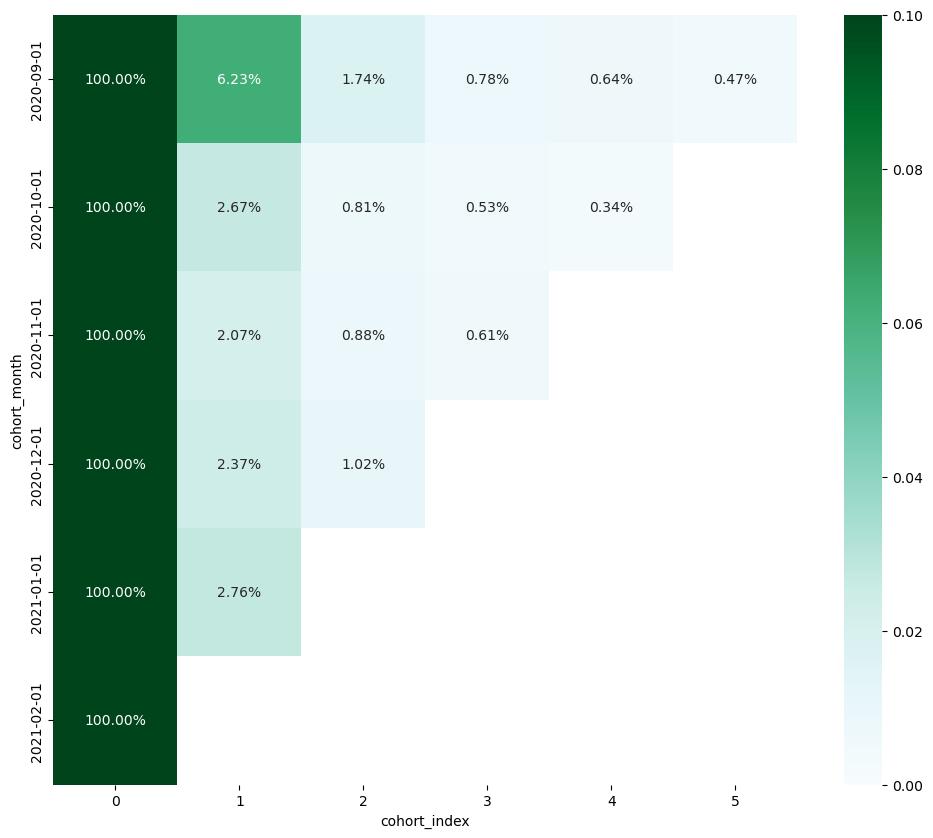

In [23]:
plt.figure(figsize = (12, 10))
sns.heatmap(data = cohorts_pivot,
            annot = True,
            fmt = '.2%',
            vmin = 0.0,
            vmax = 0.1,
            cmap = 'BuGn')